In [5]:
from glob import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.optimizers import RMSprop

In [2]:
data= glob('./SOCOFing/thumb/right/*.bmp')
images = []
def read_images(data):
    for i in range(len(data)):
        img = cv2.imread(data[i],0)
        img = cv2.resize(img,(100,100))
        images.append(img)
    return images
print(len(data))
images = read_images(data)
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr = images_arr.reshape(-1,100,100)
print(images_arr.shape)

600
(600, 100, 100)


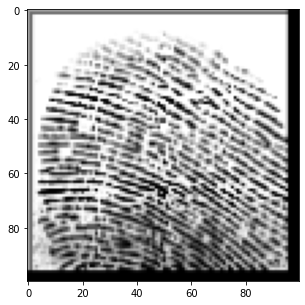

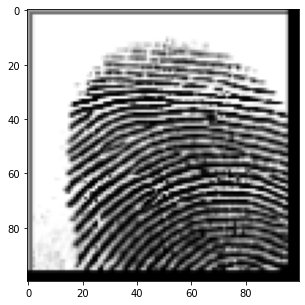

In [3]:
for i in range(2):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(images_arr[i], (100,100))
    plt.imshow(curr_img, cmap='gray')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_y,valid_y = train_test_split(images_arr[0:301],images_arr[0:301],test_size=0.2,random_state=13)
batch_size = 150
epochs = 50

# Input layer
input_img = tf.keras.layers.Input(shape=(100, 100, 1))

# Encoder network
# Convert images into a compressed, encoded representation
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder network
# Convert compressed representation into an approximation of original data
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile model
autoencoder = tf.keras.models.Model(input_img, decoded)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'mae'])

autoencoder.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['accuracy'])



In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_y))

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'a'))
